# Importation des bibliothéques

Cette partie traite de l'importation des différentes librairies dont nous aurons besoin tout au long de notre projet afin de traiter les données mises à disposition par la société HumanForYou.

- Pandas est une librairie python qui permet de manipuler facilement des données à analyser

- Matplotlib.pyplot est une collection de fonctions qui permettent à matplotlib de fonctionner comme MATLAB. Chaque fonction pyplot apporte une modification à une figure : par exemple, elle crée une figure, crée une zone de traçage dans une figure, trace des lignes dans une zone de traçage, décore le tracé avec des étiquettes, etc.

- NumPy est très utile pour effectuer des calculs logiques et mathématiques sur des tableaux et des matrices.

- Le module os en Python permet d'interagir avec les fonctionnalités du système d'exploitation et d'accéder aux informations.

- Scikit-learn est une bibliothèque d'analyse de données open source et la référence en matière d'apprentissage automatique dans l'écosystème Python.



In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, roc_curve, auc

# Definition des constantes

Ici, nous allons vous décrire l'ensemble des variables qui seront utilisées dans l'ensemble des calculs tout au long du projet


In [192]:
PROJECT_ROOT_DIR = "."
dataFolder = "data"
outputFolder = "output"

ImageFolder = "Image"
ProcessDataFolder = "ProcessedData"


In [193]:
employee_Survey_File = "employee_survey_data.csv"
general_Data_File = "general_data.csv"
in_Time_File = "in_time.csv"
out_Time_File = "out_time.csv"
manager_Survey_File = "manager_survey_data.csv"

# Importation des données

Au sein de cette partie, nous allons importer les données que nous disposions afin de traiter ces données.

In [194]:
generalData = pd.read_csv(os.path.join(PROJECT_ROOT_DIR,dataFolder,general_Data_File))
generalHeaders = list(generalData.columns.values)

employeSurvey = pd.read_csv(os.path.join(PROJECT_ROOT_DIR,dataFolder,employee_Survey_File))
employeSurveyHeaders = list(employeSurvey.columns.values)

manager_Survey_Data = pd.read_csv(os.path.join(PROJECT_ROOT_DIR,dataFolder,manager_Survey_File))
managerSurveyHeader = list(manager_Survey_Data.columns.values)

in_Time = pd.read_csv(os.path.join(PROJECT_ROOT_DIR,dataFolder,in_Time_File),header=None,skiprows=1)
out_Time = pd.read_csv(os.path.join(PROJECT_ROOT_DIR,dataFolder,out_Time_File),header=None,skiprows=1)

# Traitement de in_Time and out_Time

Dans cette partie, nous allons modifier ces données afin de ne pas avoir les données d'entrées et de sorties des employés. Pour les regrouper en une seule et même métrique.

In [195]:
employeeTimeDifferences = [ [] for i in range(len(in_Time[0]))]
shape = in_Time.shape

for col in range(1,shape[1]):
    for row in range(shape[0]):
        inTime = pd.to_datetime(in_Time[col][row])
        outTime = pd.to_datetime(out_Time[col][row])

        if pd.isnull(in_Time[col][row]) or pd.isnull(out_Time[col][row]):
            pass
        else:
            CurrentTime =abs((inTime-outTime).total_seconds())/(3600)
            employeeTimeDifferences[row].append(CurrentTime)


In [196]:
employeeTimeMeanAverage = [ [] for i in range(len(in_Time[0]))]
for i in range(len(employeeTimeDifferences)):
    employeeTimeMeanAverage[i] = 8 - np.mean(employeeTimeDifferences[i]) 

# Definition de fonction

In [197]:
def To_dataframe(column_headers,target):
    df = pd.DataFrame(target,columns=column_headers)
    return df

# Analyse préalable des données

Nous avons pris l'ensemble des colonnes du tableau et nous les avons traité afin d'avoir un visuel graphique dans le but de pouvoir analyser ces données : 

- Age, Distance domicile-travail, nombres d'années d'études, ect..

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>]],
      dtype=object)

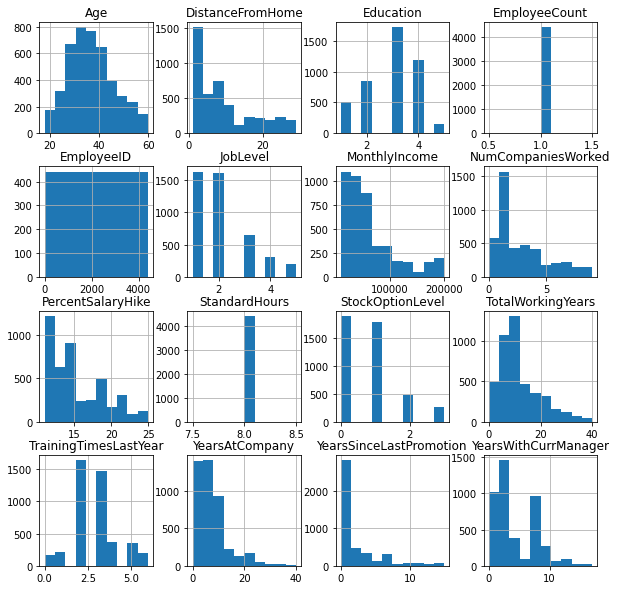

In [198]:
generalData.hist(figsize=(10,10))

In [199]:
generalData.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  
count           4410.000000  
mean               4.123129  
std                3.567327  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

# Encodage des valeurs qualitative

C'est le fait que les valeurs n'ont pas forcément de valeur numérique.

exemples : L'attrition est devenue un label, le voyage est devenu un encodage ordoné...
chacune des catégories possède sa colonne afin de savoir si c'est la catégorie choisie ou non (oneHotEncoding --> pour département et educationfield)

In [200]:

ordinal_encoder = LabelEncoder()
General_Attrition_Encoded = ordinal_encoder.fit_transform(generalData[["Attrition"]])

ordinal_encoder = OrdinalEncoder(categories=[["Non-Travel","Travel_Rarely","Travel_Frequently"]])
General_Travel_Encoded = ordinal_encoder.fit_transform(generalData[["BusinessTravel"]])
General_Travel_Cat = ordinal_encoder.categories_



C:\Users\ray-h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [201]:
oneHotEncoding = OneHotEncoder(sparse_output=False)
General_Dep_1hot = oneHotEncoding.fit_transform(generalData[["Department"]])
General_Dep_Cat = oneHotEncoding.categories_


oneHotEncoding = OneHotEncoder(sparse_output=False)
General_EduFie_1hot = oneHotEncoding.fit_transform(generalData[["EducationField"]])
General_EduFie_Cat = oneHotEncoding.categories_

# Convertion en dataframe

Ici on convertit toutes nos données en dataframe afin de pouvoir les ré analyser et les fusionner

In [202]:
AttritionDataframe = To_dataframe(["AttritionNum"],General_Attrition_Encoded)
TravelDataframe = To_dataframe(["TravelNum"],General_Travel_Encoded)
DepDataframe = To_dataframe(["Departement " + i for i in General_Dep_Cat[0]],General_Dep_1hot)
EduFieDataframe = To_dataframe(["EducationField "+i for i in General_EduFie_Cat[0]],General_EduFie_1hot)
WorkingDayMean = To_dataframe(["AverageWorkTime"],employeeTimeMeanAverage)

# Analyse temps de travail journalier moyen

In [203]:
WorkingDayMean.describe()

AverageWorkTime
count      4410.000000
mean          0.299208
std           1.340218
min          -3.030960
25%          -0.368703
50%           0.593239
75%           1.326667
max           2.049496

# Combinaison des dataframes

Ici, on fusionne les colonnes en partant sur la base que les index des lignes restent les mêmes.

In [204]:
DataGeneralToProcess = generalData.copy()

In [205]:
FinalDataframe = pd.concat([DataGeneralToProcess, AttritionDataframe,TravelDataframe,DepDataframe,EduFieDataframe,employeSurvey,manager_Survey_Data,WorkingDayMean], axis=1)

In [207]:
FinalDataframe

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   
4409                28          3        Medical              1        4410   

      Gender  ...  EducationField Other EducationField Technical Degree  \
0     Female  ...                   0.0                             0.0   
1     Female  ...                   0.0                             0.0   
2       Male  ...                   1.0                             0.0   
3       Male  ...                   0.0                             0.0   
4       Male  ...                   0.0                             0.0   
...      ...  ...                   ...                             ...   
4405  Female  ...                   0.0                             0.0   
4406    Male  ...                   0.0                             0.0   
4407    Male  ...                   0.0                             0.0   
4408    Male  ...                   0.0                             0.0   
4409    Male  ...                   0.0                             0.0   

      EmployeeID  EnvironmentSatisfaction  JobSatisfaction WorkLifeBalance  \
0              1                      3.0              4.0             2.0   
1              2                      3.0              2.0             4.0   
2              3                      2.0              2.0             1.0   
3              4                      4.0              4.0             3.0   
4              5                      4.0              1.0             3.0   
...          ...                      ...              ...             ...   
4405        4406                      4.0              1.0             3.0   
4406        4407                      4.0              4.0             3.0   
4407        4408                      1.0              3.0             3.0   
4408        4409                      4.0              1.0             3.0   
4409        4410                      1.0              3.0             NaN   

      EmployeeID  JobInvolvement  PerformanceRating  AverageWorkTime  
0              1               3                  3         0.626349  
1              2               2                  4         0.281031  
2              3               3                  3         0.986760  
3              4               2                  3         0.806322  
4              5               3                  3        -0.006175  


# Retrait des colonnes traitées et déterminées inutiles

Ici, on a retiré les colonnes inutiles et éthiquement invalides.

In [208]:
FinalDataframe = FinalDataframe.drop("Age",axis=1)
FinalDataframe = FinalDataframe.drop("Gender",axis=1)
FinalDataframe = FinalDataframe.drop("MaritalStatus",axis=1)
FinalDataframe = FinalDataframe.drop("Over18",axis=1)
FinalDataframe = FinalDataframe.drop("StandardHours",axis=1)
FinalDataframe = FinalDataframe.drop("JobRole",axis=1)
FinalDataframe = FinalDataframe.drop("EducationField",axis=1)
FinalDataframe = FinalDataframe.drop("Department",axis=1)
FinalDataframe = FinalDataframe.drop("EmployeeID",axis=1)
FinalDataframe = FinalDataframe.drop("EmployeeCount",axis=1)
FinalDataframe = FinalDataframe.drop("Attrition",axis=1)
FinalDataframe = FinalDataframe.drop("BusinessTravel",axis=1)
FinalDataframe

DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0                    6          2         1         131160   
1                   10          1         1          41890   
2                   17          4         4         193280   
3                    2          5         3          83210   
4                   10          1         1          23420   
...                ...        ...       ...            ...   
4405                 5          4         1          60290   
4406                 2          4         1          26790   
4407                25          2         2          37020   
4408                18          2         1          23980   
4409                28          3         2          54680   

      NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0                    1.0                 11                 0   
1                    0.0                 23                 1   
2                    1.0                 15                 3   
3                    3.0                 11                 3   
4                    4.0                 12                 2   
...                  ...                ...               ...   
4405                 3.0                 17                 1   
4406                 2.0                 15                 0   
4407                 0.0                 20                 0   
4408                 0.0                 14                 1   
4409                 0.0                 12                 0   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  ...  \
0                   1.0                      6               1  ...   
1                   6.0                      3               5  ...   
2                   5.0                      2               5  ...   
3                  13.0                      5               8  ...   
4                   9.0                      2               6  ...   
...                 ...                    ...             ...  ...   
4405               10.0                      5               3  ...   
4406               10.0                      2               3  ...   
4407                5.0                      4               4  ...   
4408               10.0                      2               9  ...   
4409                NaN                      6              21  ...   

      EducationField Marketing  EducationField Medical  EducationField Other  \
0                          0.0                     0.0                   0.0   
1                          0.0                     0.0                   0.0   
2                          0.0                     0.0                   1.0   
3                          0.0                     0.0                   0.0   
4                          0.0                     1.0                   0.0   
...                        ...                     ...                   ...   
4405                       0.0                     1.0                   0.0   
4406                       0.0                     1.0                   0.0   
4407                       0.0                     0.0                   0.0   
4408                       0.0                     1.0                   0.0   
4409                       0.0                     1.0                   0.0   

      EducationField Technical Degree  EnvironmentSatisfaction  \
0                                 0.0                      3.0   
1                                 0.0                      3.0   
2                                 0.0                      2.0   
3                                 0.0                      4.0   
4                                 0.0                      4.0   
...                               ...                      ...   
4405                              0.0                      4.0   
4406                              0.0                      4.0   
4407                              0.0                      1.0   
4408  

# Determination de la correlation avec le départ des employés

Ici, on récupère la correlation entre l'attrition et l'ensemble des colonnes restantes et nous récupérons les 8 colonnes les plus corrélées (cela correspond aux valeurs les plus éloignées de 0)
On a affiché la matrice de confusion afin de déterminer s'il y a des liaisons, dû à la nature des données, elle est difficilement lisible. De ce fait, nous ne l'avons pas mise dans la présentation.

In [209]:
Correlation = FinalDataframe.corr()["AttritionNum"]
CorrelationAbs = np.abs(Correlation)


In [210]:
columnsCorr = CorrelationAbs.sort_values(ascending=False).index.to_list()[:8]
columnsCorr

['AttritionNum',
 'AverageWorkTime',
 'TotalWorkingYears',
 'YearsWithCurrManager',
 'YearsAtCompany',
 'TravelNum',
 'JobSatisfaction',
 'EnvironmentSatisfaction']

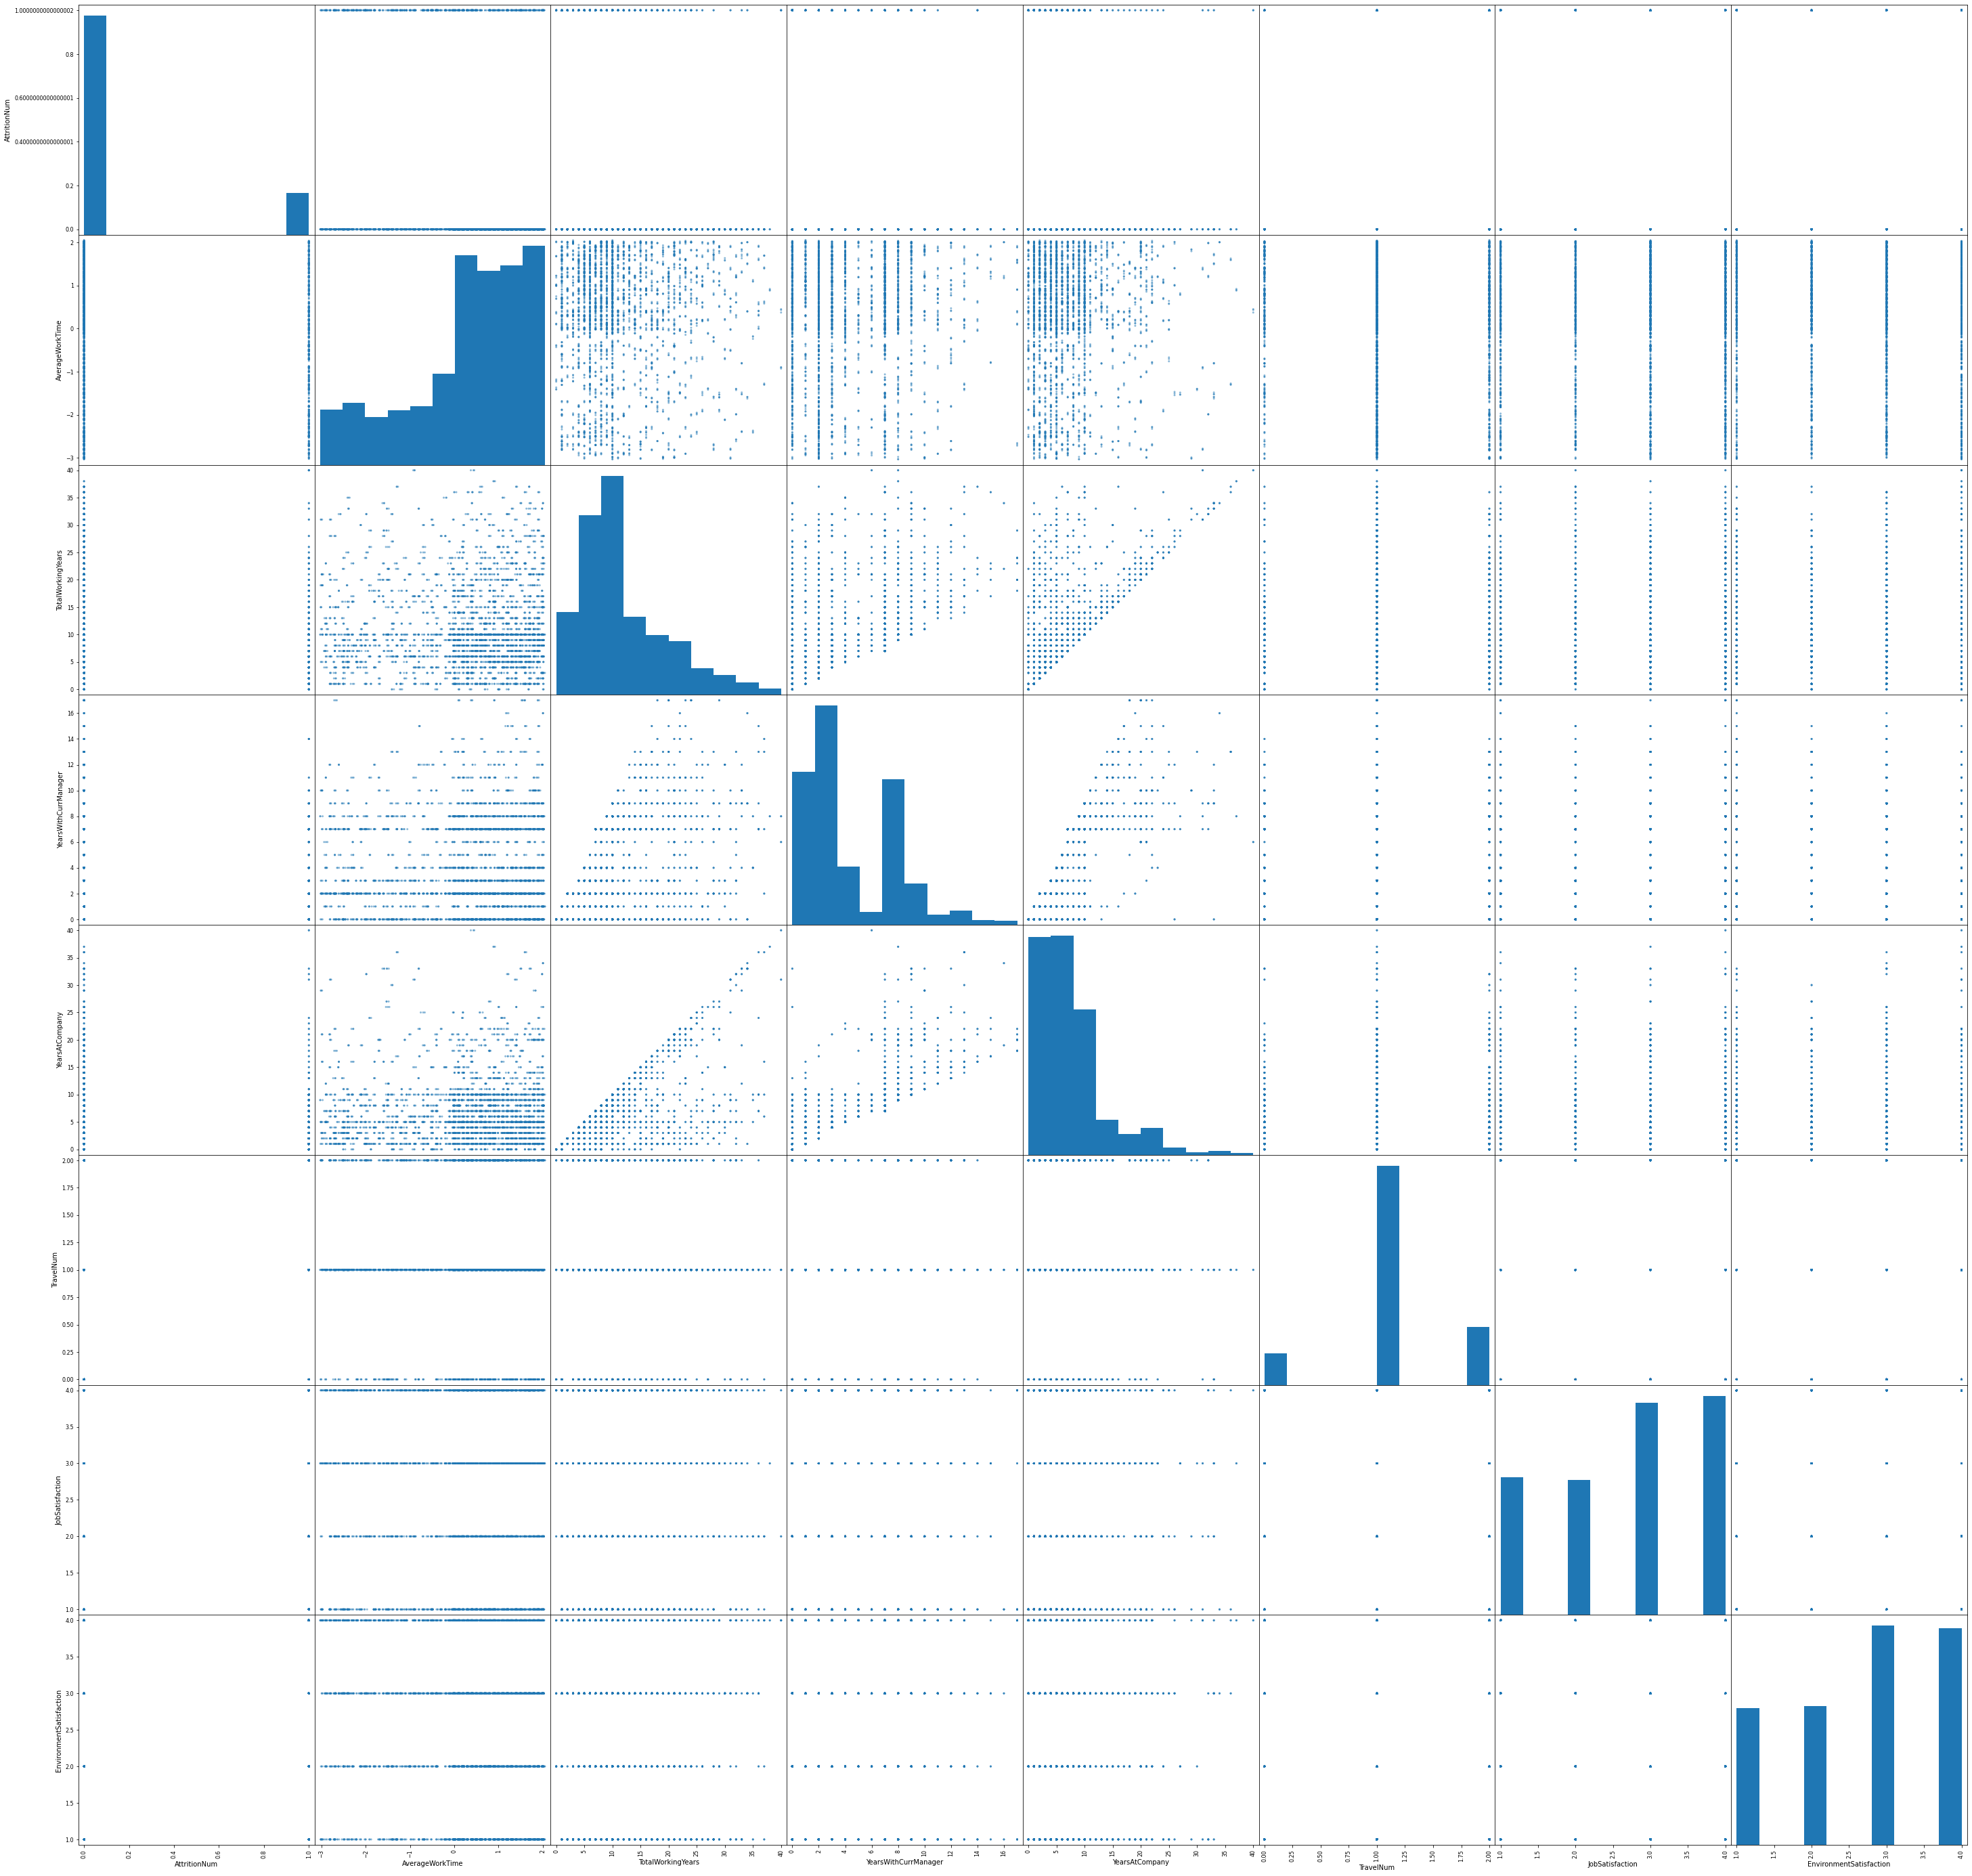

In [211]:
CorrelationDataFrame = pd.DataFrame(FinalDataframe["AttritionNum"])
for i in columnsCorr:
    if i != "AttritionNum":
        CorrelationDataFrame = pd.concat([CorrelationDataFrame,FinalDataframe[i]],axis=1)

pd.plotting.scatter_matrix(CorrelationDataFrame, figsize=(50, 50))


# Trie des colonnes en fonction de la correlation

Ici, on récupère les 7 colonnes les plus corrélées à l'attrition.

In [ ]:

FinalDataframe = CorrelationDataFrame

# Imputation des données

Nous avons décidé de faire une imputation des plus proches voisins pour les valeurs N/A afin de ne pas causer trop de biais qui serait amené par les autres imputations.

In [212]:

imputer = KNNImputer(weights="distance")

In [213]:
ImputesNumpyArray = imputer.fit_transform(FinalDataframe)

In [214]:
ImputesDataframe = To_dataframe(list(FinalDataframe.columns.values),ImputesNumpyArray)

#Data Selection

These are the new column we will have at the end of the pipeline

EmployeID: An identifier to identify the row used
Attrition: To specify if the employe leaved or not
Buisness_Travel: To specify if the employee frequently travel for buisness related reason
Departement : The departement from where the employee is from



In [215]:
ImputesDataframe.describe()

AttritionNum  AverageWorkTime  TotalWorkingYears  YearsWithCurrManager  \
count   4410.000000      4410.000000        4410.000000           4410.000000   
mean       0.161224         0.299208          11.279539              4.123129   
std        0.367780         1.340218           7.779051              3.567327   
min        0.000000        -3.030960           0.000000              0.000000   
25%        0.000000        -0.368703           6.000000              2.000000   
50%        0.000000         0.593239          10.000000              3.000000   
75%        0.000000         1.326667          15.000000              7.000000   
max        1.000000         2.049496          40.000000             17.000000   

       YearsAtCompany    TravelNum  JobSatisfaction  EnvironmentSatisfaction  
count     4410.000000  4410.000000      4410.000000              4410.000000  
mean         7.008163     1.086395         2.728608                 2.721505  
std          6.125135     0.532049         1.102371                 1.092782  
min          0.000000     0.000000         1.000000                 1.000000  
25%          3.000000     1.000000         2.000000                 2.000000  
50%          5.000000     1.000000         3.000000                 3.000000  
75%          9.000000     1.000000         4.000000                 4.000000  
max         40.000000     2.000000         4.000000                 4.000000

# Normalisation

Nous avons décidé de normaliser les valeurs min et max étant donné que nous avons remarqué de valeurs abérentes.


In [216]:
 scaler = MinMaxScaler()

 scaledNumpyArray = scaler.fit_transform(ImputesDataframe)

In [217]:
scaledDataframe = To_dataframe(list(ImputesDataframe.columns.values),scaledNumpyArray)

In [218]:
scaledDataframe.describe()

AttritionNum  AverageWorkTime  TotalWorkingYears  YearsWithCurrManager  \
count   4410.000000      4410.000000        4410.000000           4410.000000   
mean       0.161224         0.655486           0.281988              0.242537   
std        0.367780         0.263799           0.194476              0.209843   
min        0.000000         0.000000           0.000000              0.000000   
25%        0.000000         0.524019           0.150000              0.117647   
50%        0.000000         0.713361           0.250000              0.176471   
75%        0.000000         0.857724           0.375000              0.411765   
max        1.000000         1.000000           1.000000              1.000000   

       YearsAtCompany    TravelNum  JobSatisfaction  EnvironmentSatisfaction  
count     4410.000000  4410.000000      4410.000000              4410.000000  
mean         0.175204     0.543197         0.576203                 0.573835  
std          0.153128     0.266025         0.367457                 0.364261  
min          0.000000     0.000000         0.000000                 0.000000  
25%          0.075000     0.500000         0.333333                 0.333333  
50%          0.125000     0.500000         0.666667                 0.666667  
75%          0.225000     0.500000         1.000000                 1.000000  
max          1.000000     1.000000         1.000000                 1.000000

# Model Implementation

Nous avons implémenté plusieurs models que nous avons mis dans une liste de classifier et nous avons récupéré les métriques moyennes pour chacunes d'entres elles, à noter que nous avons choisi une graine d'aléatoire de 42. Nous avons fait 5 tests pour chacun des models afin de pouvoir obtenir la moyenne des resultats au lieu de résultat sprécifique à un essai.

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = scaledDataframe.drop('AttritionNum', axis=1)
y = scaledDataframe['AttritionNum']

Evaluating DecisionTreeClassifier...
Accuracy: 0.97 $\pm$ 0.01
F1 Score: 0.91 $\pm$ 0.04
Recall: 0.91 $\pm$ 0.04
ROC AUC: 0.95 $\pm$ 0.02


Evaluating RandomForestClassifier...
Accuracy: 0.99 $\pm$ 0.00
F1 Score: 0.97 $\pm$ 0.01
Recall: 0.95 $\pm$ 0.03
ROC AUC: 1.00 $\pm$ 0.00


Evaluating MLPClassifier...


C:\Users\ray-h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ray-h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ray-h\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ray-h\A

Accuracy: 0.86 $\pm$ 0.01
F1 Score: 0.37 $\pm$ 0.05
Recall: 0.26 $\pm$ 0.04
ROC AUC: 0.78 $\pm$ 0.03


Evaluating KNeighborsClassifier...
Accuracy: 0.81 $\pm$ 0.01
F1 Score: 0.35 $\pm$ 0.05
Recall: 0.31 $\pm$ 0.06
ROC AUC: 0.89 $\pm$ 0.01


Evaluating GradientBoostingClassifier...
Accuracy: 0.87 $\pm$ 0.01
F1 Score: 0.44 $\pm$ 0.05
Recall: 0.31 $\pm$ 0.04
ROC AUC: 0.85 $\pm$ 0.01




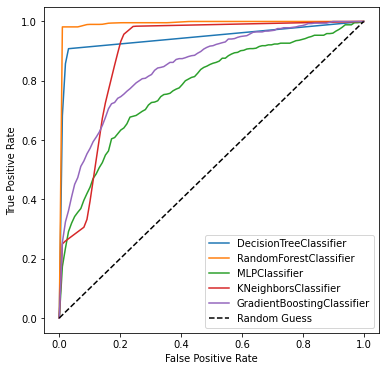

In [220]:
# Define the cross-validation method
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Create a list of classifiers to compare
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    #GaussianNB(),
    #LogisticRegression(),
    #SVC(probability=True),
    MLPClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    #LinearDiscriminantAnalysis()
]

fig, ax = plt.subplots(figsize=(6, 6))
# Train and evaluate each classifier using cross-validation

# Initialize the metrics dictionaries
accuracy_dict = {}
f1_dict = {}
recall_dict = {}
roc_auc_dict = {}

for clf in classifiers:
    print(f"Evaluating {clf.__class__.__name__}...")
    f1_scores = []
    accuracy_scores = []
    recall_scores = []
    roc_auc_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        proba = clf.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, proba[:, 1])
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        recall_scores.append(recall)
        roc_auc_scores.append(roc_auc)
        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, proba[:, 1])
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = roc_auc_score(y_test, proba[:, 1])
        aucs.append(roc_auc)

    
       
    # Plot the ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, label=f'{clf.__class__.__name__}')
    #/////////////////////////////////////////////////////////////
    # Compute the mean and standard deviation of the results
    accuracy_mean = np.mean(accuracy_scores)
    f1_mean = np.mean(f1_scores)
    recall_mean = np.mean(recall_scores)
    roc_auc_mean = np.mean(roc_auc_scores)
    accuracy_std = np.std(accuracy_scores)
    f1_std = np.std(f1_scores)
    recall_std = np.std(recall_scores)
    roc_auc_std = np.std(roc_auc_scores)
    # Store the results in the dictionaries
    accuracy_dict[clf.__class__.__name__] = (accuracy_mean, accuracy_std)
    f1_dict[clf.__class__.__name__] = (f1_mean, f1_std)
    recall_dict[clf.__class__.__name__] = (recall_mean, recall_std)
    roc_auc_dict[clf.__class__.__name__] = (roc_auc_mean, roc_auc_std)
    # Print the results
    print(f"Accuracy: {accuracy_mean:.2f} $\pm$ {accuracy_std:.2f}")
    print(f"F1 Score: {f1_mean:.2f} $\pm$ {f1_std:.2f}")
    print(f"Recall: {recall_mean:.2f} $\pm$ {recall_std:.2f}")
    print(f"ROC AUC: {roc_auc_mean:.2f} $\pm$ {roc_auc_std:.2f}")
    print("\n")
ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()
# Add the legend and show